<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Deep-Learning-Projects/blob/main/multiclass-classification/iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diretório de trabalho

- Montagem do Google Drive e alteração do diretório de trabalho para acessar os arquivos do notebook e os dados utilizados no projeto:

In [ ]:
from google.colab import drive
import os

# Monta o drive no Google Colab
drive.mount('/content/drive',force_remount=True)

# Altera o diretório de trabalho
os.chdir('/content/drive/MyDrive/Colab Notebooks/UDEMY/DEEP LEARNING')

Mounted at /content/drive


# Importação de Pacotes e Funções

- Importação dos principais pacotes utilizados ao longo do projeto, incluindo `pandas, numpy, matplotlib.pyplot, scikit-learn e keras` para manipulação de dados e construção do modelo:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

# Carregando os Dados

- Carregamento dos dados das variáveis de entrada e saída referentes ao câncer de mama:

In [ ]:
base = pd.read_csv('5 classificação multiclasse - base iris/iris.csv')

- Visualização das primeiras linhas dos dados para conferir sua estrutura:

In [ ]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [ ]:
# Convert the target variable to a Pandas Series
classe_series = pd.Series(classe)

# Get the unique values and their counts
unique_values= classe_series.unique()

# Print the unique values and their counts
print(unique_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


- Codificando as classes de string para valores numéricos

In [ ]:
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)

In [ ]:
classe = to_categorical(classe)

In [ ]:
classe[1]

array([1., 0., 0.], dtype=float32)

## Divisão dos Dados

- Divisão dos dados em conjuntos de treinamento e teste, utilizando uma proporção de 75% para treinamento e 25% para teste:

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)

# Construção da Rede

In [ ]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=4))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(previsores_treinamento, classe_treinamento, batch_size=10, epochs=1000)

Epoch 1/1000
12/12 [==============================] - 1s 3ms/step - loss: 0.8572 - categorical_accuracy: 0.5893
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.8337 - categorical_accuracy: 0.5714
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.8208 - categorical_accuracy: 0.5804
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.8064 - categorical_accuracy: 0.5982
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7917 - categorical_accuracy: 0.6964
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.7738 - categorical_accuracy: 0.7768
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7607 - categorical_accuracy: 0.7857
Epoch 8/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.7467 - categorical_accuracy: 0.8214
Epoch 9/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.7369 - categorical_accuracy:

# Avaliação

In [ ]:
resultado = model.evaluate(previsores_teste, classe_teste)

2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - categorical_accuracy: 1.0000


In [ ]:
previsoes = model.predict(previsores_teste)

2/2 [==============================] - 0s 6ms/step


In [ ]:
previsoes = (previsoes > 0.5)

In [ ]:
previsoes[0]

array([False, False,  True])

In [ ]:
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

100 : Iris-setosa
010 : Iris-versicolor
001 : Iris-virginica


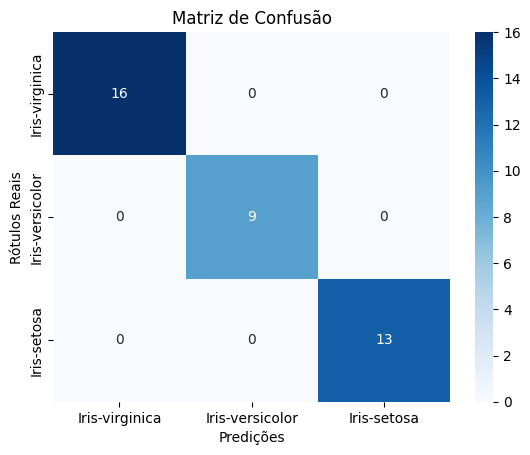

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("100 : Iris-setosa")
print("010 : Iris-versicolor")
print("001 : Iris-virginica")

class_labels = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

# Plotar a matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)  # Adiciona rótulos personalizados
plt.xlabel('Predições')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Relatório de classificação detalhado
classification_rep = classification_report(classe_teste, previsoes, target_names=["Iris-virginica", "Iris-versicolor", "Iris-setosa"])
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00         9
    Iris-setosa       1.00      1.00      1.00        13

      micro avg       1.00      1.00      1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38
    samples avg       1.00      1.00      1.00        38



# Validação Cruzada

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
    classificador.add(Dense(units = 4, activation = 'relu'))
    classificador.add(Dense(units = 3, activation = 'softmax'))
    classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                          metrics = ['accuracy', 'AUC'])
    return classificador

In [ ]:
# Criar o classificador usando a função definida
classificador = criarRede()

- O processo de validação cruzada foi repetido, registrando os resultados para cada fold e calculando as métricas médias e os desvios padrão:

In [ ]:
# Configurar KFold
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

fold_metrics = []
k = 1

# Loop para realizar validação cruzada manualmente
for train_index, test_index in kf.split(previsores):
    print(f"Processando fold {k}...")
    k += 1

    # Use indexação do NumPy para dividir os dados
    X_train = previsores[train_index]  # Não use iloc, apenas colchetes
    X_test = previsores[test_index]
    y_train = classe[train_index]
    y_test = classe[test_index]

    # Criar e treinar o modelo
    modelo = criarRede()  # Função para criar o modelo
    modelo.fit(X_train, y_train, epochs=100)

    # Avaliar o modelo
    resultado = modelo.evaluate(X_test, y_test)
    fold_metrics.append(resultado)  # Armazenar métricas do fold

Processando fold 1...
Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 1.0085 - accuracy: 0.6593 - auc: 0.6501
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9840 - accuracy: 0.6593 - auc: 0.6796
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9620 - accuracy: 0.6593 - auc: 0.7058
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.9412 - accuracy: 0.6593 - auc: 0.7253
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9194 - accuracy: 0.6593 - auc: 0.7397
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8985 - accuracy: 0.6593 - auc: 0.7561
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8783 - accuracy: 0.6593 - auc: 0.7909
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8594 - accuracy: 0.6593 - auc: 0.8221
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.8423 - accuracy: 

## Métricas

- Cálculo da média e desvio padrão das métricas após todos os folds:

In [ ]:
# Média das métricas após todos os folds
mean_metrics = np.mean(fold_metrics, axis=0)
loss_mean = mean_metrics[0]
accuracy_mean = mean_metrics[1]
auc_mean = mean_metrics[2]

print(f'Métricas médias após {n_splits}-Fold Cross-Validation: {mean_metrics}')
print(f'Média da Perda: {loss_mean:.3f}')
print(f'Média da Acurácia: {accuracy_mean:.3f}')
print(f'Média do AUC: {auc_mean:.3f}')

Métricas médias após 10-Fold Cross-Validation: [0.68399533 0.70666668 0.85477777]
Média da Perda: 0.684
Média da Acurácia: 0.707
Média do AUC: 0.855


In [ ]:
# Calcular o desvio padrão para cada métrica
std_devs = np.std(fold_metrics, axis=0)
loss_std = std_devs[0]
accuracy_std = std_devs[1]
auc_std = std_devs[2]

print(f'Desvio padrão das métricas após {n_splits}-Fold Cross-Validation: {std_devs}')
print(f'Desvio padrão da Perda: {loss_std:.3f}')
print(f'Desvio padrão da Acurácia: {accuracy_std:.3f}')
print(f'Desvio padrão do AUC: {auc_std:.3f}')

Desvio padrão das métricas após 10-Fold Cross-Validation: [0.23874864 0.22744962 0.17815242]
Desvio padrão da Perda: 0.239
Desvio padrão da Acurácia: 0.227
Desvio padrão do AUC: 0.178


- Visualização dos resultados por meio de gráficos de barras para cada métrica ao longo dos folds:

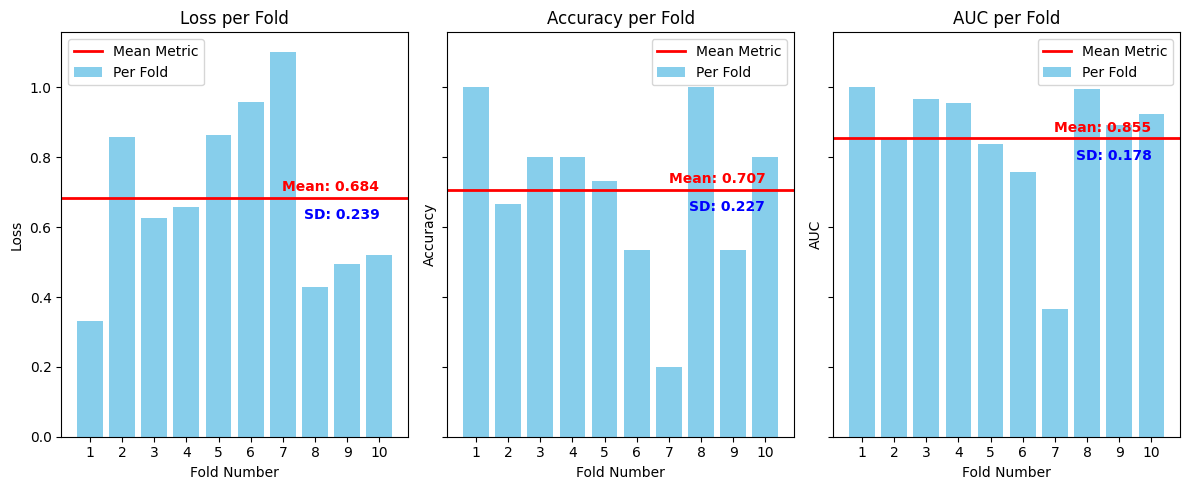

In [ ]:
# Nomes das métricas
metric_names = ['Loss', 'Accuracy', 'AUC']

fold_metrics_np = np.array(fold_metrics)

# Criar um plot para cada métrica
fig, axs = plt.subplots(1, len(metric_names), figsize=(12, 5), sharey=True)

for i, metric_name in enumerate(metric_names):

    # Extrair a métrica específica de todos os folds
    metric_values = fold_metrics_np[:, i]

    # Índices para o eixo x
    x = np.arange(len(metric_values)) + 1  # Folds 1 a K

    # Plotando as métricas de cada fold
    axs[i].bar(x, metric_values, color='skyblue', label='Per Fold')

    # Linha horizontal para a média
    axs[i].axhline(y=mean_metrics[i], color='red', linewidth=2, label='Mean Metric')

    # Anotação para a média
    axs[i].text(x=len(metric_values), y=mean_metrics[i] + 0.03, s=f'Mean: {mean_metrics[i]:.3f}',
                color='red', va='center', ha='right', fontweight='bold')

    # Anotação para o desvio padrão
    axs[i].text(x=len(metric_values), y=mean_metrics[i] - 0.07, s=f'SD: {std_devs[i]:.3f}',
                color='blue', va='bottom', ha='right', fontweight='bold')

    # Adicionando título e fazendo ajustes no eixo
    axs[i].set_title(f'{metric_name} per Fold')
    axs[i].set_xlabel('Fold Number')
    axs[i].set_xticks(x)
    axs[i].set_ylabel(metric_name)
    axs[i].legend()

# Mostrar o plot
plt.tight_layout()
plt.show()

# Overfitting e Dropout

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
    classificador.add(Dropout(0.1))
    classificador.add(Dense(units = 4, activation = 'relu'))
    classificador.add(Dropout(0.1))
    classificador.add(Dense(units = 3, activation = 'softmax'))
    classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                          metrics = ['accuracy', 'AUC'])
    return classificador

In [ ]:
# Criar o classificador usando a função definida
classificador = criarRede()

In [ ]:
# Configurar KFold
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

fold_metrics = []
k = 1

# Loop para realizar validação cruzada manualmente
for train_index, test_index in kf.split(previsores):
    print(f"Processando fold {k}...")
    k += 1

    # Use indexação do NumPy para dividir os dados
    X_train = previsores[train_index]  # Não use iloc, apenas colchetes
    X_test = previsores[test_index]
    y_train = classe[train_index]
    y_test = classe[test_index]

    # Criar e treinar o modelo
    modelo = criarRede()  # Função para criar o modelo
    modelo.fit(X_train, y_train, epochs=100)

    # Avaliar o modelo
    resultado = modelo.evaluate(X_test, y_test)
    fold_metrics.append(resultado)  # Armazenar métricas do fold

Processando fold 1...
Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 1.1288 - accuracy: 0.4963 - auc: 0.5707
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1941 - accuracy: 0.4741 - auc: 0.5704
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 1.1202 - accuracy: 0.5259 - auc: 0.6374
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 1.1472 - accuracy: 0.5407 - auc: 0.6030
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0763 - accuracy: 0.6000 - auc: 0.6619
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0690 - accuracy: 0.5556 - auc: 0.6495
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0981 - accuracy: 0.5259 - auc: 0.6360
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9902 - accuracy: 0.5481 - auc: 0.7036
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.9539 - accuracy: 

In [ ]:
# Média das métricas após todos os folds
mean_metrics = np.mean(fold_metrics, axis=0)
loss_mean = mean_metrics[0]
accuracy_mean = mean_metrics[1]
auc_mean = mean_metrics[2]

print(f'Métricas médias após {n_splits}-Fold Cross-Validation: {mean_metrics}')
print(f'Média da Perda: {loss_mean:.3f}')
print(f'Média da Acurácia: {accuracy_mean:.3f}')
print(f'Média do AUC: {auc_mean:.3f}')

Métricas médias após 10-Fold Cross-Validation: [0.65750634 0.70000001 0.84255556]
Média da Perda: 0.658
Média da Acurácia: 0.700
Média do AUC: 0.843


In [ ]:
# Calcular o desvio padrão para cada métrica
std_devs = np.std(fold_metrics, axis=0)
loss_std = std_devs[0]
accuracy_std = std_devs[1]
auc_std = std_devs[2]

print(f'Desvio padrão das métricas após {n_splits}-Fold Cross-Validation: {std_devs}')
print(f'Desvio padrão da Perda: {loss_std:.3f}')
print(f'Desvio padrão da Acurácia: {accuracy_std:.3f}')
print(f'Desvio padrão do AUC: {auc_std:.3f}')

Desvio padrão das métricas após 10-Fold Cross-Validation: [0.26401139 0.304412   0.23055652]
Desvio padrão da Perda: 0.264
Desvio padrão da Acurácia: 0.304
Desvio padrão do AUC: 0.231


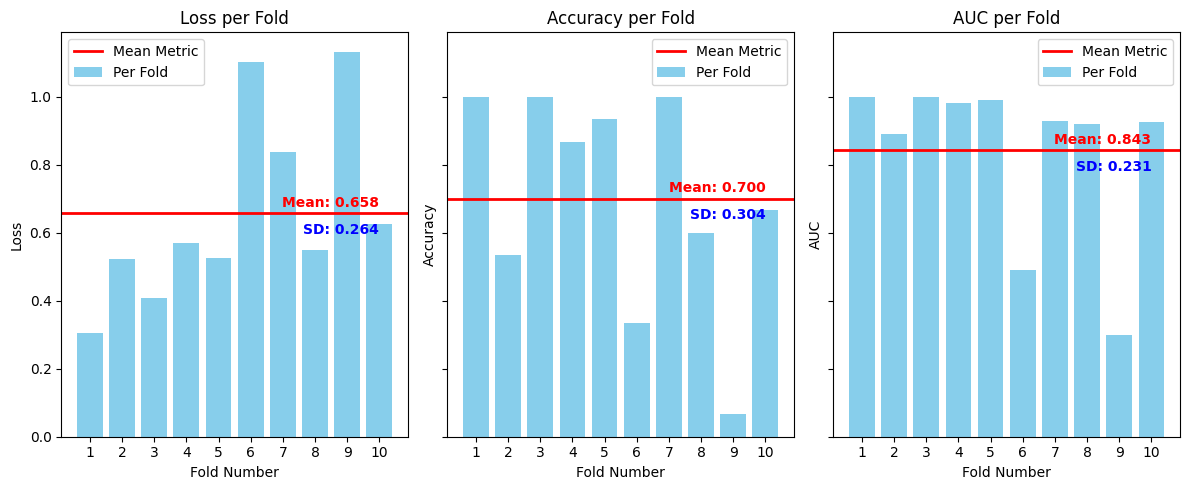

In [ ]:
# Nomes das métricas
metric_names = ['Loss', 'Accuracy', 'AUC']

fold_metrics_np = np.array(fold_metrics)

# Criar um plot para cada métrica
fig, axs = plt.subplots(1, len(metric_names), figsize=(12, 5), sharey=True)

for i, metric_name in enumerate(metric_names):

    # Extrair a métrica específica de todos os folds
    metric_values = fold_metrics_np[:, i]

    # Índices para o eixo x
    x = np.arange(len(metric_values)) + 1  # Folds 1 a K

    # Plotando as métricas de cada fold
    axs[i].bar(x, metric_values, color='skyblue', label='Per Fold')

    # Linha horizontal para a média
    axs[i].axhline(y=mean_metrics[i], color='red', linewidth=2, label='Mean Metric')

    # Anotação para a média
    axs[i].text(x=len(metric_values), y=mean_metrics[i] + 0.03, s=f'Mean: {mean_metrics[i]:.3f}',
                color='red', va='center', ha='right', fontweight='bold')

    # Anotação para o desvio padrão
    axs[i].text(x=len(metric_values), y=mean_metrics[i] - 0.07, s=f'SD: {std_devs[i]:.3f}',
                color='blue', va='bottom', ha='right', fontweight='bold')

    # Adicionando título e fazendo ajustes no eixo
    axs[i].set_title(f'{metric_name} per Fold')
    axs[i].set_xlabel('Fold Number')
    axs[i].set_xticks(x)
    axs[i].set_ylabel(metric_name)
    axs[i].legend()

# Mostrar o plot
plt.tight_layout()
plt.show()

# Hiperparametrização

- Uma busca por hiperparâmetros foi conduzida utilizando uma combinação de diferentes valores de parâmetros para otimizar o desempenho do modelo. Foram utilizadas várias configurações de parâmetros, incluindo otimizadores, funções de perda, ativadores, e tamanho de lote:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import KFold
import itertools  # Para criar todas as combinações possíveis de parâmetros
import numpy as np

# Função para criar a rede neural com parâmetros configuráveis
def criarRede(optimizer, loss, kernel_initializer, activation, neurons):
    classificador = Sequential()
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer, input_dim=4))
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer))
    classificador.add(Dense(units=3, activation='softmax'))
    classificador.compile(optimizer=optimizer, loss=loss,
                          metrics=['accuracy', 'AUC'])
    return classificador

# Definir hiperparâmetros a serem testados
parametros = {
    'batch_size': [10, 30],
    'epochs': [50],
    'optimizer': ['adam', 'RMSprop'],
    'loss': ['categorical_crossentropy'],
    'kernel_initializer': ['normal'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 16, 8]
}

# Gerar todas as combinações de hiperparâmetros
combinacoes = list(itertools.product(*parametros.values()))

# Configurar validação cruzada
kf = KFold(n_splits=3, shuffle=True, random_state=1)

# Lista para armazenar resultados
resultados = []

# Loop para testar cada combinação de hiperparâmetros
for combinacao in combinacoes:
    # Desempacotar a combinação para treinar o modelo
    hyperparams = dict(zip(parametros.keys(), combinacao))
    print(f"Testando combinação: {hyperparams}")

    # Lista para armazenar precisão de cada fold
    fold_metrics = []

    # Loop para validação cruzada
    for train_idx, test_idx in kf.split(previsores):
        # Criar o modelo, sem 'batch_size'
        modelo = criarRede(
            optimizer=hyperparams['optimizer'],
            loss=hyperparams['loss'],
            kernel_initializer=hyperparams['kernel_initializer'],
            activation=hyperparams['activation'],
            neurons=hyperparams['neurons']
        )

        # Indexação do NumPy para acessar dados
        X_train = previsores[train_idx]  # Usar colchetes para indexar arrays do NumPy
        y_train = classe[train_idx]
        modelo.fit(X_train, y_train, epochs=hyperparams['epochs'], batch_size=hyperparams['batch_size'], verbose=0)

        # Mesma abordagem para o conjunto de teste
        X_test = previsores[test_idx]
        y_test = classe[test_idx]
        metrics = modelo.evaluate(X_test, y_test, verbose=0)  # Obter precisão
        fold_metrics.append(metrics)

    # Calcular a média de precisão para cada combinação
    media = np.mean(fold_metrics)  # Calcular a média das precisões dos folds
    resultados.append((hyperparams, media))  # Armazenar hiperparâmetros e precisão média

# Ordenar resultados por precisão para encontrar a melhor combinação
resultados.sort(key=lambda x: x[1], reverse=True)

print("Melhor combinação de hiperparâmetros:", resultados[0][0])
print("Melhor precisão:", resultados[0][1])


Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 32}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 16}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 8}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'kernel_initializer': 'normal', 'activation': 'tanh', 'neurons': 32}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'categorical_crossentropy', 'kernel_initializer': 'normal', 'activation': 'tanh', 'neurons': 16}
Testando combinação: {'batch_size': 10, 'epochs': 50, 'optimizer': 'adam', 'loss': 'categorical_cross

- A melhor combinação de hiperparâmetros foi determinada pela maior precisão média:

In [ ]:
# Ordenar resultados por precisão para encontrar a melhor combinação
resultados.sort(key=lambda x: x[1], reverse=True)

print("Melhor combinação de hiperparâmetros:", resultados[0][0])
print("Melhor precisão:", resultados[0][1])

Melhor combinação de hiperparâmetros: {'batch_size': 30, 'epochs': 50, 'optimizer': 'RMSprop', 'loss': 'categorical_crossentropy', 'kernel_initializer': 'normal', 'activation': 'relu', 'neurons': 16}
Melhor precisão: 0.7648968233002557


# Rede Final

- A rede final foi treinada com os melhores hiperparâmetros e o histórico do treinamento foi registrado para análise posterior:

In [ ]:
# Função para criar a rede neural com parâmetros configuráveis
def criarRede(optimizer, loss, kernel_initializer, activation, neurons):
    classificador = Sequential()
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer, input_dim=4))
    classificador.add(Dense(units=neurons, activation=activation,
                            kernel_initializer=kernel_initializer))
    classificador.add(Dense(units=3, activation='softmax'))
    classificador.compile(optimizer=optimizer, loss=loss,
                          metrics=['categorical_accuracy', 'AUC'])
    return classificador

In [ ]:
classificador = criarRede(optimizer='RMSprop', loss='categorical_crossentropy',
                          kernel_initializer='normal', activation='relu', neurons=16)

In [ ]:
history = classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 30, epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 1s 9ms/step - loss: 1.0744 - categorical_accuracy: 0.3393 - auc: 0.5988
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0527 - categorical_accuracy: 0.3393 - auc: 0.6363
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.0356 - categorical_accuracy: 0.3393 - auc: 0.6310
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.0187 - categorical_accuracy: 0.3393 - auc: 0.6578
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.0007 - categorical_accuracy: 0.3750 - auc: 0.6908
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.9826 - categorical_accuracy: 0.3929 - auc: 0.6994
Epoch 7/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.9639 - categorical_accuracy: 0.6071 - auc: 0.7785
Epoch 8/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.9447 - categorical_accuracy: 0.6429 - auc: 0.7928
Epoch 9

- Visualização das curvas de perda, precisão e AUC ao longo do treinamento final:

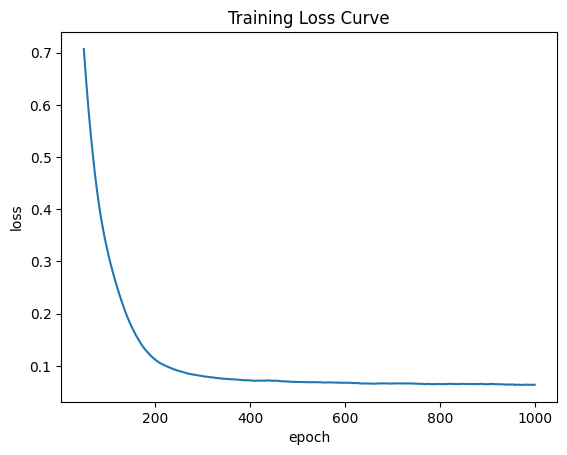

In [ ]:
loss = pd.Series(history.history['loss']).rolling(50).mean()

plt.plot( loss )
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

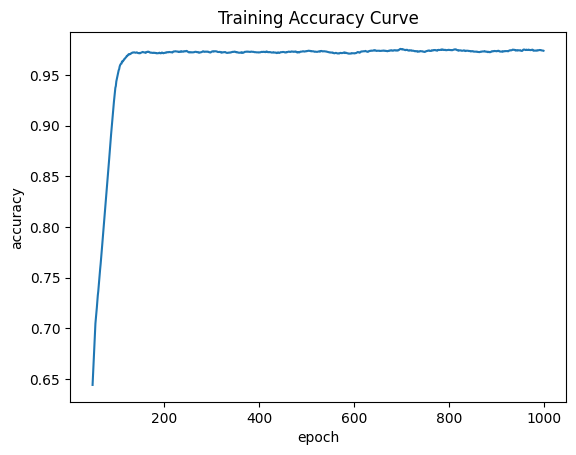

In [ ]:
acc = pd.Series(history.history['categorical_accuracy']).rolling(50).mean()

plt.plot( acc )
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training Accuracy Curve")
plt.show()

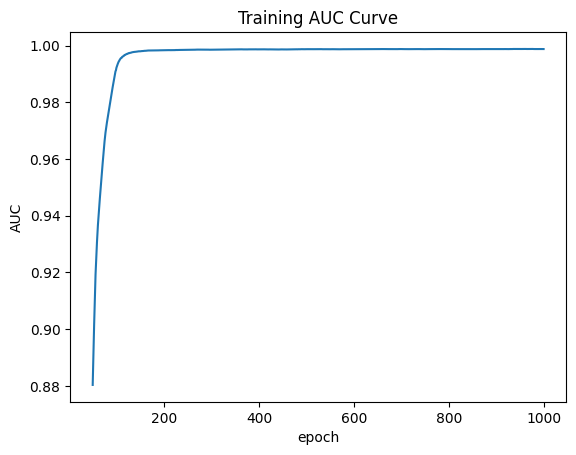

In [ ]:
auc = pd.Series(history.history['auc']).rolling(50).mean()

plt.plot( auc)
plt.ylabel("AUC")
plt.xlabel("epoch")
plt.title("Training AUC Curve")
plt.show()

## Salvando e Carregando o Modelo

- O modelo foi salvo para uso futuro e testado para garantir a precisão das predições:

In [ ]:
# Salvar o modelo
classificador.save("5 classificação multiclasse - base iris/iris model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Carregar o modelo
classificador = tf.keras.models.load_model("5 classificação multiclasse - base iris/iris model.h5")

## Predições

- Predições foram realizadas com o modelo carregado, obtendo a matriz de confusão e precisão:

In [ ]:
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
precisao = accuracy_score(classe_teste, previsoes)
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))
resultado = classificador.evaluate(previsores_teste, classe_teste)

2/2 [==============================] - 0s 10ms/step - loss: 0.0288 - categorical_accuracy: 0.9737 - auc: 0.9997


In [ ]:
precisao

0.9736842105263158

In [ ]:
matriz_confusao

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]])

- Visualização da matriz de confusão:

100 : Iris-setosa
010 : Iris-versicolor
001 : Iris-virginica


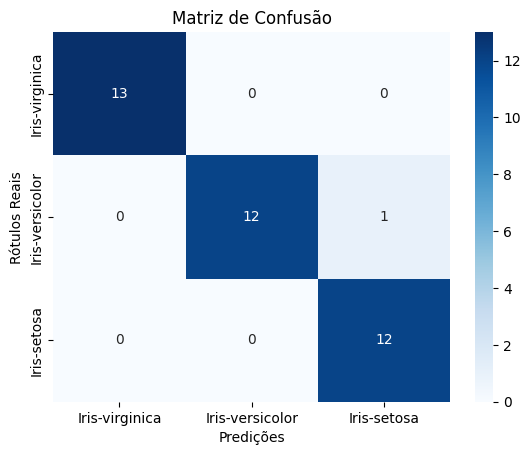

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("100 : Iris-setosa")
print("010 : Iris-versicolor")
print("001 : Iris-virginica")

class_labels = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(classe_teste.argmax(axis=1), previsoes.argmax(axis=1))

# Plotar a matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)  # Adiciona rótulos personalizados
plt.xlabel('Predições')
plt.ylabel('Rótulos Reais')
plt.title('Matriz de Confusão')
plt.show()


- Relatório de classificação detalhado para análise dos resultados finais:

In [ ]:
from sklearn.metrics import classification_report

# Relatório de classificação detalhado
classification_rep = classification_report(classe_teste, previsoes, target_names=["Iris-virginica", "Iris-versicolor", "Iris-setosa"])
print("Relatório de Classificação:")
print(classification_rep)

Relatório de Classificação:
                 precision    recall  f1-score   support

 Iris-virginica       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        13
    Iris-setosa       0.92      1.00      0.96        12

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38
    samples avg       0.97      0.97      0.97        38

